In [90]:
 import pyforest

In [91]:
ho=pd.read_csv(r'C:\Users\AKSHAY\Downloads\HospitalityEmployees.csv',parse_dates=['Date'],index_col=['Date'])
ho.head()

<IPython.core.display.Javascript object>

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

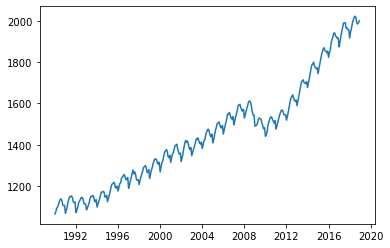

In [92]:
plt.plot(ho)
plt.show()

In [93]:
ho.tail(2)

,Employees
Date,
2018-11-01,1990.1
2018-12-01,2000.2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

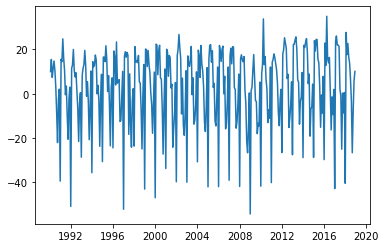

In [94]:
plt.plot(ho.diff())
plt.show()

## A tough fight bet ho and ho1
##### both with d=1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

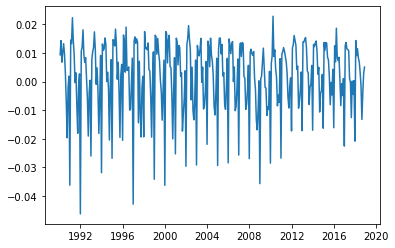

In [95]:
h01=np.log(ho)
plt.plot(h01.diff())
plt.show()

In [96]:
h01.diff().mean()

Employees    0.001818
dtype: float64

In [97]:
h01.var()

Employees    0.030165
dtype: float64

In [98]:
h01.diff().describe()

,Employees
count,347.000000
mean,0.001818
std,0.012537
min,-0.046321
25%,-0.004255
50%,0.004779
75%,0.011416
max,0.022850


In [99]:
ho.shape

(348, 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

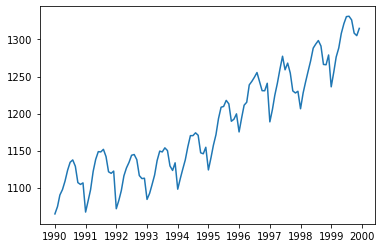

In [100]:
plt.plot(ho[:120])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

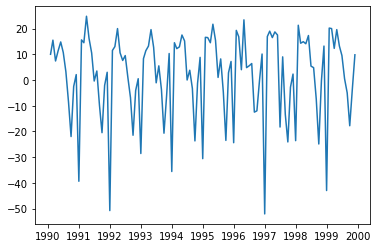

In [101]:
plt.plot(ho.diff()[:120])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

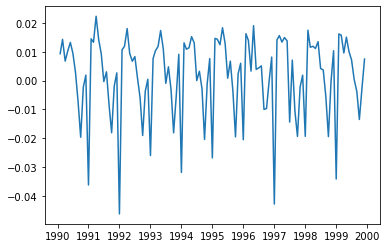

In [102]:
plt.plot(h01.diff()[:120])
plt.show()

In [103]:
from statsmodels.tsa.stattools import acf,pacf

#from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ho only

In [104]:
train_ho=ho.iloc[:-24]
test_ho=ho.iloc[-24:]

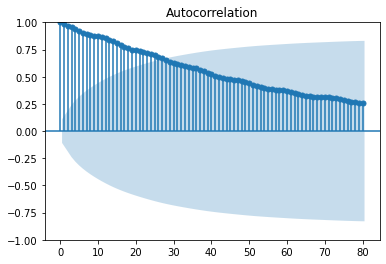

In [105]:
plot_acf(train_ho.Employees,lags=80);

D:\Installation\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


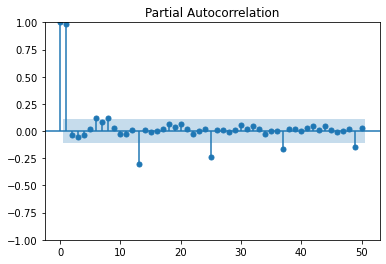

In [106]:
plot_pacf(train_ho.Employees,lags=50);

p=0,d=1,q=2

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

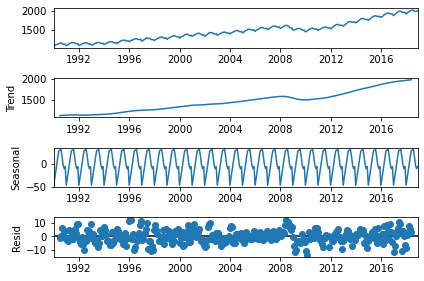

In [108]:
result= seasonal_decompose(ho)

result.plot();

In [49]:
# Lets check without season
auto_arima(ho)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [109]:
model_without_season=SARIMAX(ho,order=(2, 1, 0))
results=model_without_season.fit()

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [110]:
ho.shape

(348, 1)

In [111]:
pred=results.predict(start=324,end=347)
pred[:5]

2017-01-01    1915.301254
2017-02-01    1868.142365
2017-03-01    1894.257302
2017-04-01    1930.353068
2017-05-01    1952.151504
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

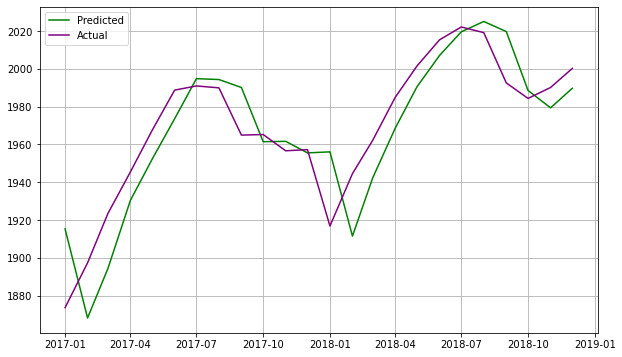

In [112]:
plt.figure(figsize=(10,6))
plt.plot(pred,color="g",label='Predicted')
plt.plot(test_ho,color='purple',label='Actual')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

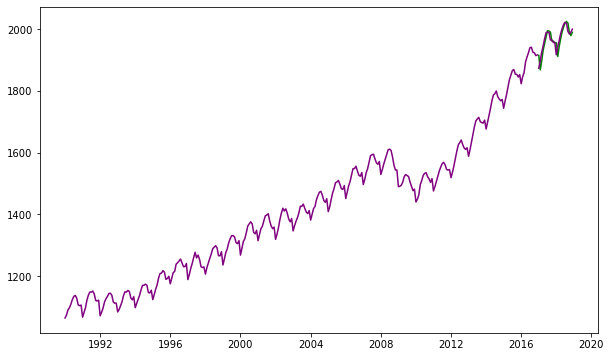

In [113]:
plt.figure(figsize=(10,6))
plt.plot(pred,color="g")
plt.plot(test_ho,color='purple')
plt.plot(train_ho,color='purple')
plt.show()

In [114]:
error=test_ho.Employees-pred
MES_ARIMA=np.mean(np.square(error))
print("Mean Square Error :",np.mean(np.square(error)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 389.22962798410373


In [78]:
# Lets check without season
auto_arima(ho,seasonal=True,m=12)

D:\Installation\Anaconda\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "D:\Installation\Anaconda\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "D:\Installation\Anaconda\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "D:\Installation\Anaconda\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "D:\Installation\Anaconda\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_para

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [115]:
model_season=SARIMAX(ho,order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results=model_season.fit()

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sar

In [116]:
pred_seas=results.predict(start=324,end=347)
pred_seas[:5]

2017-01-01    1885.515663
2017-02-01    1893.599410
2017-03-01    1912.674324
2017-04-01    1947.558490
2017-05-01    1966.052793
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

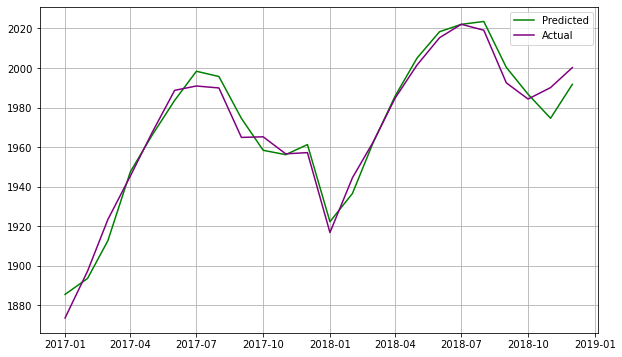

In [117]:
plt.figure(figsize=(10,6))
plt.plot(pred_seas,color="g",label='Predicted')
plt.plot(test_ho,color='purple',label='Actual')
plt.legend()
plt.grid()
plt.show()

In [119]:
error=test_ho.Employees-pred_seas
MES_SARIMA=np.mean(np.square(error))
print("Mean Square Error :",np.mean(np.square(error)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 44.292835655718385


## With Log i.e. h01

In [120]:
train_ho=h01.iloc[:-24]
test_ho=h01.iloc[-24:]

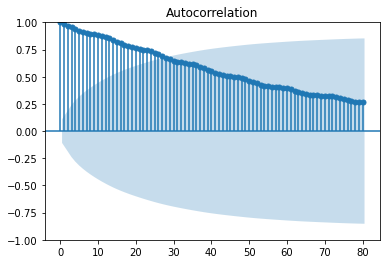

In [121]:
plot_acf(train_ho.Employees,lags=80);

D:\Installation\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


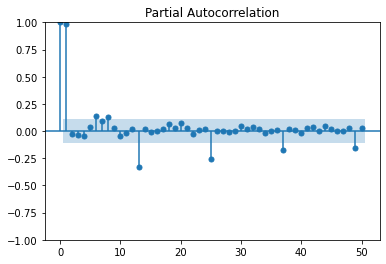

In [122]:
plot_pacf(train_ho.Employees,lags=50);

In [123]:
# Lets check without season
auto_arima(h01)

ARIMA(order=(3, 1, 4), scoring_args={}, suppress_warnings=True)

In [124]:
model_without_season=SARIMAX(ho,order=(3, 1, 4))
results=model_without_season.fit()

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Installation\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
pred=results.predict(start=324,end=347)
pred[:5]

2017-01-01    1901.307234
2017-02-01    1889.841226
2017-03-01    1902.306868
2017-04-01    1938.711083
2017-05-01    1957.962781
Freq: MS, Name: predicted_mean, dtype: float64

In [129]:
test_ho[:5]

,Employees
Date,
2017-01-01,7.535617
2017-02-01,7.548187
2017-03-01,7.561850
2017-04-01,7.573223
2017-05-01,7.584468


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

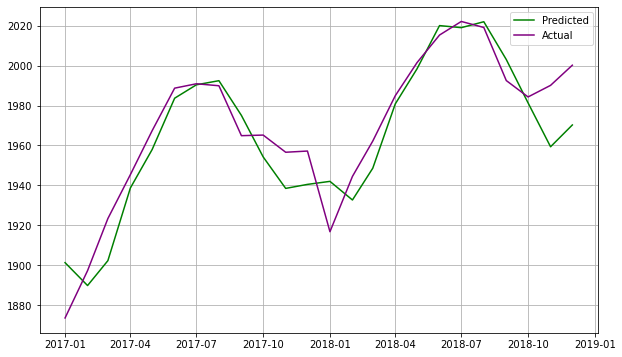

In [130]:
plt.figure(figsize=(10,6))
plt.plot(pred,color="g",label='Predicted')
plt.plot(np.exp(test_ho),color='purple',label='Actual')

plt.legend()
plt.grid()
plt.show()

In [132]:
error=np.exp(test_ho.Employees)-pred
MES_ARIMA_LOG=np.mean(np.square(error))
print("Mean Square Error :",np.mean(np.square(error)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 218.82696503711762


##### SARIMA with  log

In [134]:
# Lets check without season
auto_arima(h01,seasonal=True,m=12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [135]:
model_season=SARIMAX(ho,order=(2, 1, 1),seasonal_order=(2, 0, 1, 12))
results=model_season.fit()

D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [136]:
pred_seas=results.predict(start=324,end=347)
pred_seas[:5]

2017-01-01    1885.680008
2017-02-01    1893.543047
2017-03-01    1912.810170
2017-04-01    1947.678421
2017-05-01    1966.524861
Freq: MS, Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

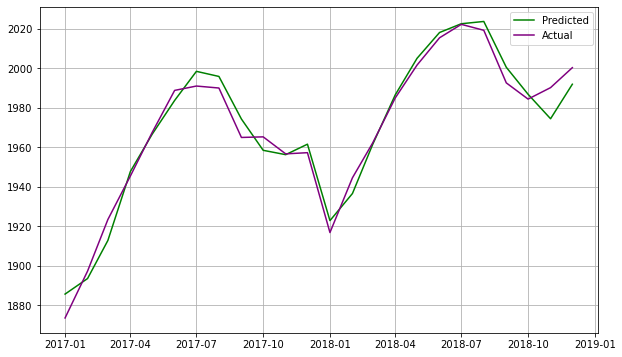

In [138]:
plt.figure(figsize=(10,6))
plt.plot(pred_seas,color="g",label='Predicted')
plt.plot(np.exp(test_ho),color='purple',label='Actual')
plt.legend()
plt.grid()
plt.show()

In [139]:
error=np.exp(test_ho.Employees)-pred_seas
MES_SARIMA_LOG=np.mean(np.square(error))
print("Mean Square Error :",np.mean(np.square(error)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Square Error : 44.70866520602649


In [141]:
pd.DataFrame([MES_ARIMA,MES_SARIMA,MES_ARIMA_LOG,MES_SARIMA_LOG],
             index=['MES_ARIMA','MES_SARIMA','MES_ARIMA_LOG','MES_SARIMA_LOG'],
            columns=['Mean Square Error'])

<IPython.core.display.Javascript object>

,Mean Square Error
MES_ARIMA,389.229628
MES_SARIMA,44.292836
MES_ARIMA_LOG,218.826965
MES_SARIMA_LOG,44.708665


# Best is MSE of Sarima

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

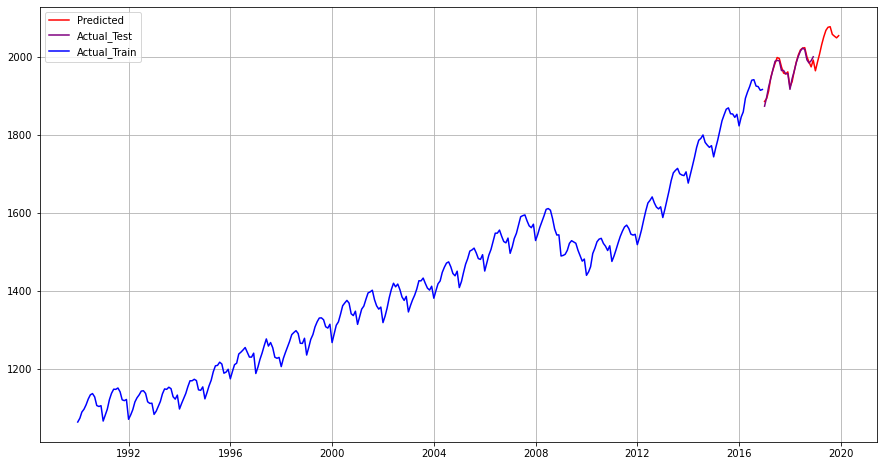

In [144]:
pred_seas=results.predict(start=324,end=359)
plt.figure(figsize=(15,8))
plt.plot(pred_seas,color="r",label='Predicted')
plt.plot(np.exp(test_ho),color='purple',label='Actual_Test')
plt.plot(np.exp(train_ho),color='blue',label='Actual_Train')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

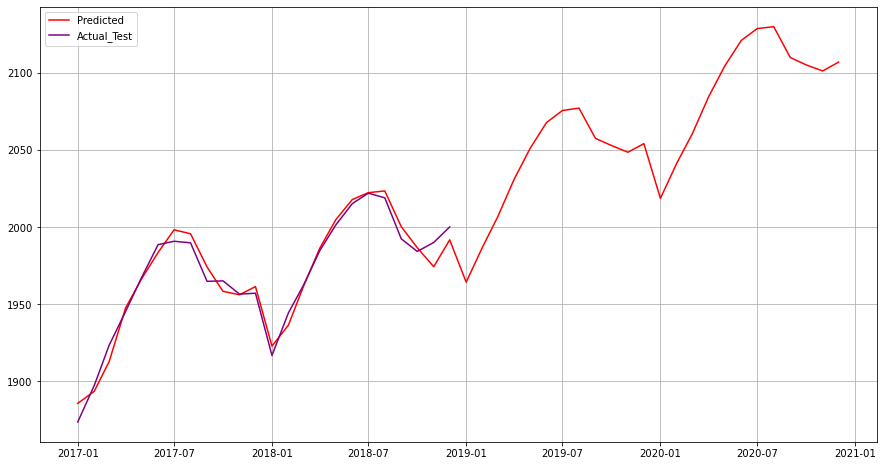

In [146]:
pred_seas=results.predict(start=324,end=371)
plt.figure(figsize=(15,8))
plt.plot(pred_seas,color="r",label='Predicted')
plt.plot(np.exp(test_ho),color='purple',label='Actual_Test')
plt.legend()
plt.grid()
plt.show()